In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from scipy.cluster.hierarchy import ward, linkage, dendrogram, single, complete

/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
def load_CoVoST2(data_path):
    data = np.load(data_path+'/speech_trn.npz', allow_pickle=True)
    Xtrn, Ytrn = data['Xtrn'], data['Ytrn']
    data = np.load(data_path+'/speech_tst.npz', allow_pickle=True)
    Xtst, Ytst = data['Xtst'], data['Ytst']
    return Xtrn, Ytrn, Xtst, Ytst

In [3]:
datapath = os.path.join(os.getcwd(),'data')

In [4]:
Xtrn,Ytrn,Xtst,Ytst = load_CoVoST2(datapath)

In [5]:
Xtrn.shape

(22000, 26)

In [6]:
Ytrn[0:25]

array([11, 20, 14, 17, 13,  9,  5, 18, 18, 12, 13, 20,  4,  0, 13, 21,  6,
       12, 21, 10, 15, 10,  0, 11, 17])

In [7]:
kmeans = KMeans(n_clusters=22, random_state=1)

In [8]:
kmeans.fit(Xtrn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [9]:
kmeans.inertia_

38185.816951386696

In [10]:
samples_per_cluster = np.zeros(22)

In [11]:
for i in range(22):
    l = len(kmeans.labels_[kmeans.labels_ == i])
    samples_per_cluster[i] = l

In [12]:
samples_per_cluster

array([1018., 1125., 1191.,  890., 1162., 1332.,  839.,  623., 1400.,
        838.,  659., 1276.,  121.,  152.,  950., 1971., 1251.,  845.,
        896.,  930., 1065., 1466.])

In [13]:
sum(samples_per_cluster)

22000.0

In [14]:
mean_l = np.zeros((22,26))

In [15]:
for i in range(22):
    x = Xtrn[Ytrn == i]
    mean_l[i] = np.mean(x, axis=0)

In [16]:
mean_l_2d = PCA(n_components=2).fit_transform(mean_l)

In [17]:
mean_l_2d.shape

(22, 2)

In [18]:
cluster_centres_2d = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)

In [19]:
cluster_centres_2d.shape

(22, 2)

In [20]:
np.arange(0,22,dtype=int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

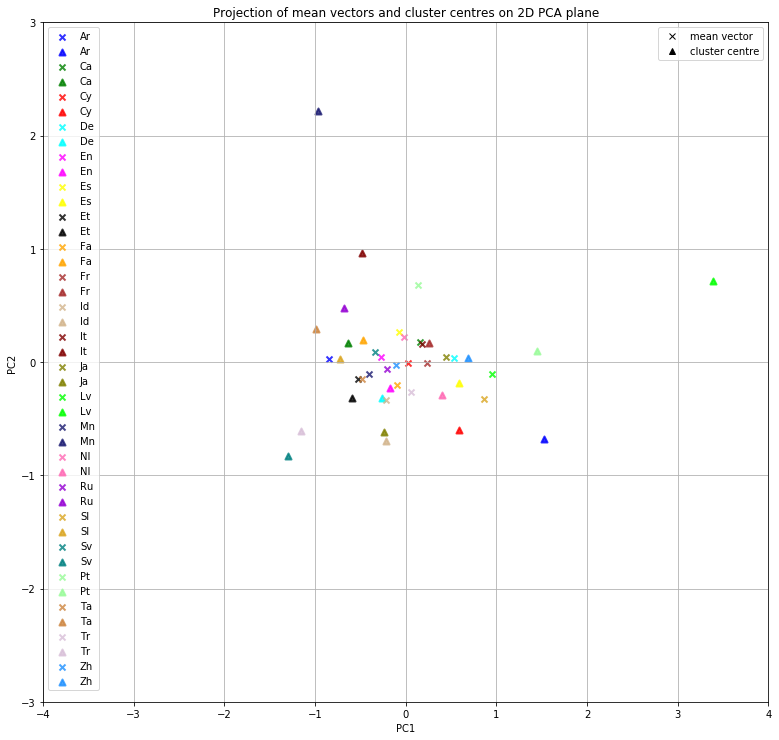

In [21]:
plt.figure(figsize=(13,12.5))
colors = ['blue','green','red','cyan','magenta','yellow','black','orange','brown','tan','maroon','olive','lime','midnightblue','hotpink','darkviolet','goldenrod','teal','palegreen','peru','thistle','dodgerblue']
target_names = ['Ar','Ca','Cy','De','En','Es','Et','Fa','Fr','Id','It','Ja','Lv','Mn','Nl','Ru','Sl','Sv','Pt','Ta','Tr','Zh']
lw = 2
for color, i, target_name in zip(colors, np.arange(0,22,dtype=int), target_names):
    plt.scatter(mean_l_2d[i,0], mean_l_2d[i,1], marker='x', color=color, alpha=.8, lw=lw,
                label=target_name, cmap=plt.get_cmap('coolwarm'))
    plt.scatter(cluster_centres_2d[i,0], cluster_centres_2d[i,1], marker='^', color=color, alpha=.8, lw=lw,
                label=target_name, cmap=plt.get_cmap('coolwarm'))
first_legend = plt.legend(loc='best', shadow=False, facecolor='inherit', scatterpoints=1)
ax = plt.gca().add_artist(first_legend)
labels=['mean vector', 'cluster centre']
markers = [Line2D([0,0],[0,0],color='black', marker='x', linestyle=''), Line2D([0,0],[0,0], color='black', marker='^', linestyle='')]
plt.legend(markers, labels, numpoints=1)
plt.grid(True)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of mean vectors and cluster centres on 2D PCA plane')
plt.savefig('2d_pca_means_and_centres.png')
plt.show()

In [35]:
Z = ward(mean_l)
len(Z)

21

In [37]:
labels = ['Ar','Ca','Cy','De','En','Es','Et','Fa','Fr','Id','It','Ja','Lv','Mn','Nl','Ru','Sl','Sv','Pt','Ta','Tr','Zh']

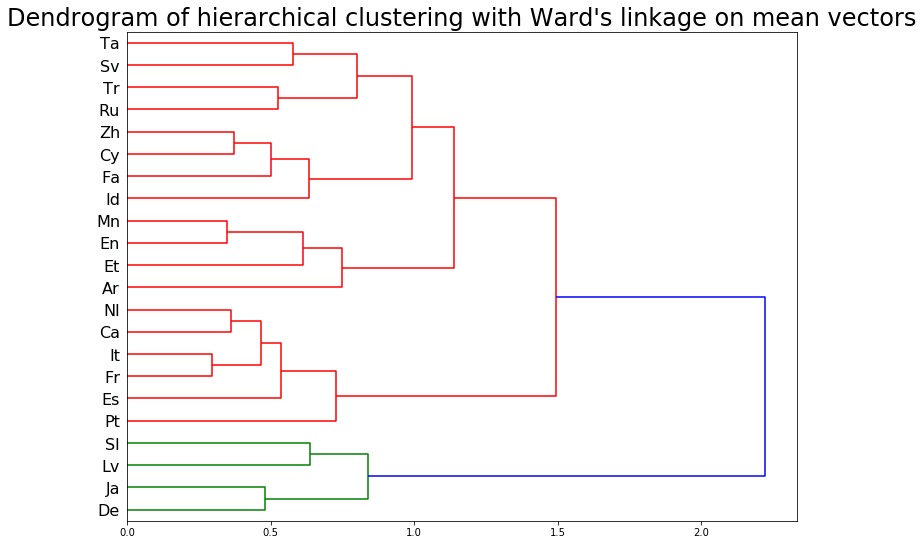

In [61]:
fig = plt.figure(figsize=(12,9))
dn = dendrogram(Z, orientation='right', leaf_font_size=16, labels=labels)
plt.title('Dendrogram of hierarchical clustering with Ward\'s linkage on mean vectors', {'fontsize': 24})
plt.savefig('cluster_dendrogram.png')
plt.show()

In [40]:
len(labels)

22

In [41]:
cluster_centres_l = np.zeros((22,3,26))

In [42]:
for i in range(22):
    # isolate language data
    x = Xtrn[Ytrn == i]
    kmeans_l = KMeans(n_clusters=3, random_state=1).fit(x)
    cluster_centres_l[i] = kmeans_l.cluster_centers_

In [43]:
cluster_centres_66 = np.zeros((66,26))
for i in range(22):
    cluster_centres_66[3*i] = cluster_centres_l[i][0]
    cluster_centres_66[3*i+1] = cluster_centres_l[i][1]
    cluster_centres_66[3*i+2] = cluster_centres_l[i][2]

In [44]:
Z_ward = ward(cluster_centres_66)

In [45]:
Z_single = single(cluster_centres_66)

In [46]:
Z_complete = complete(cluster_centres_66)

In [47]:
centre_labels = []
for i in range(22):
    centre_labels.append(labels[i]+', centre 1')
    centre_labels.append(labels[i]+', centre 2')
    centre_labels.append(labels[i]+', centre 3')

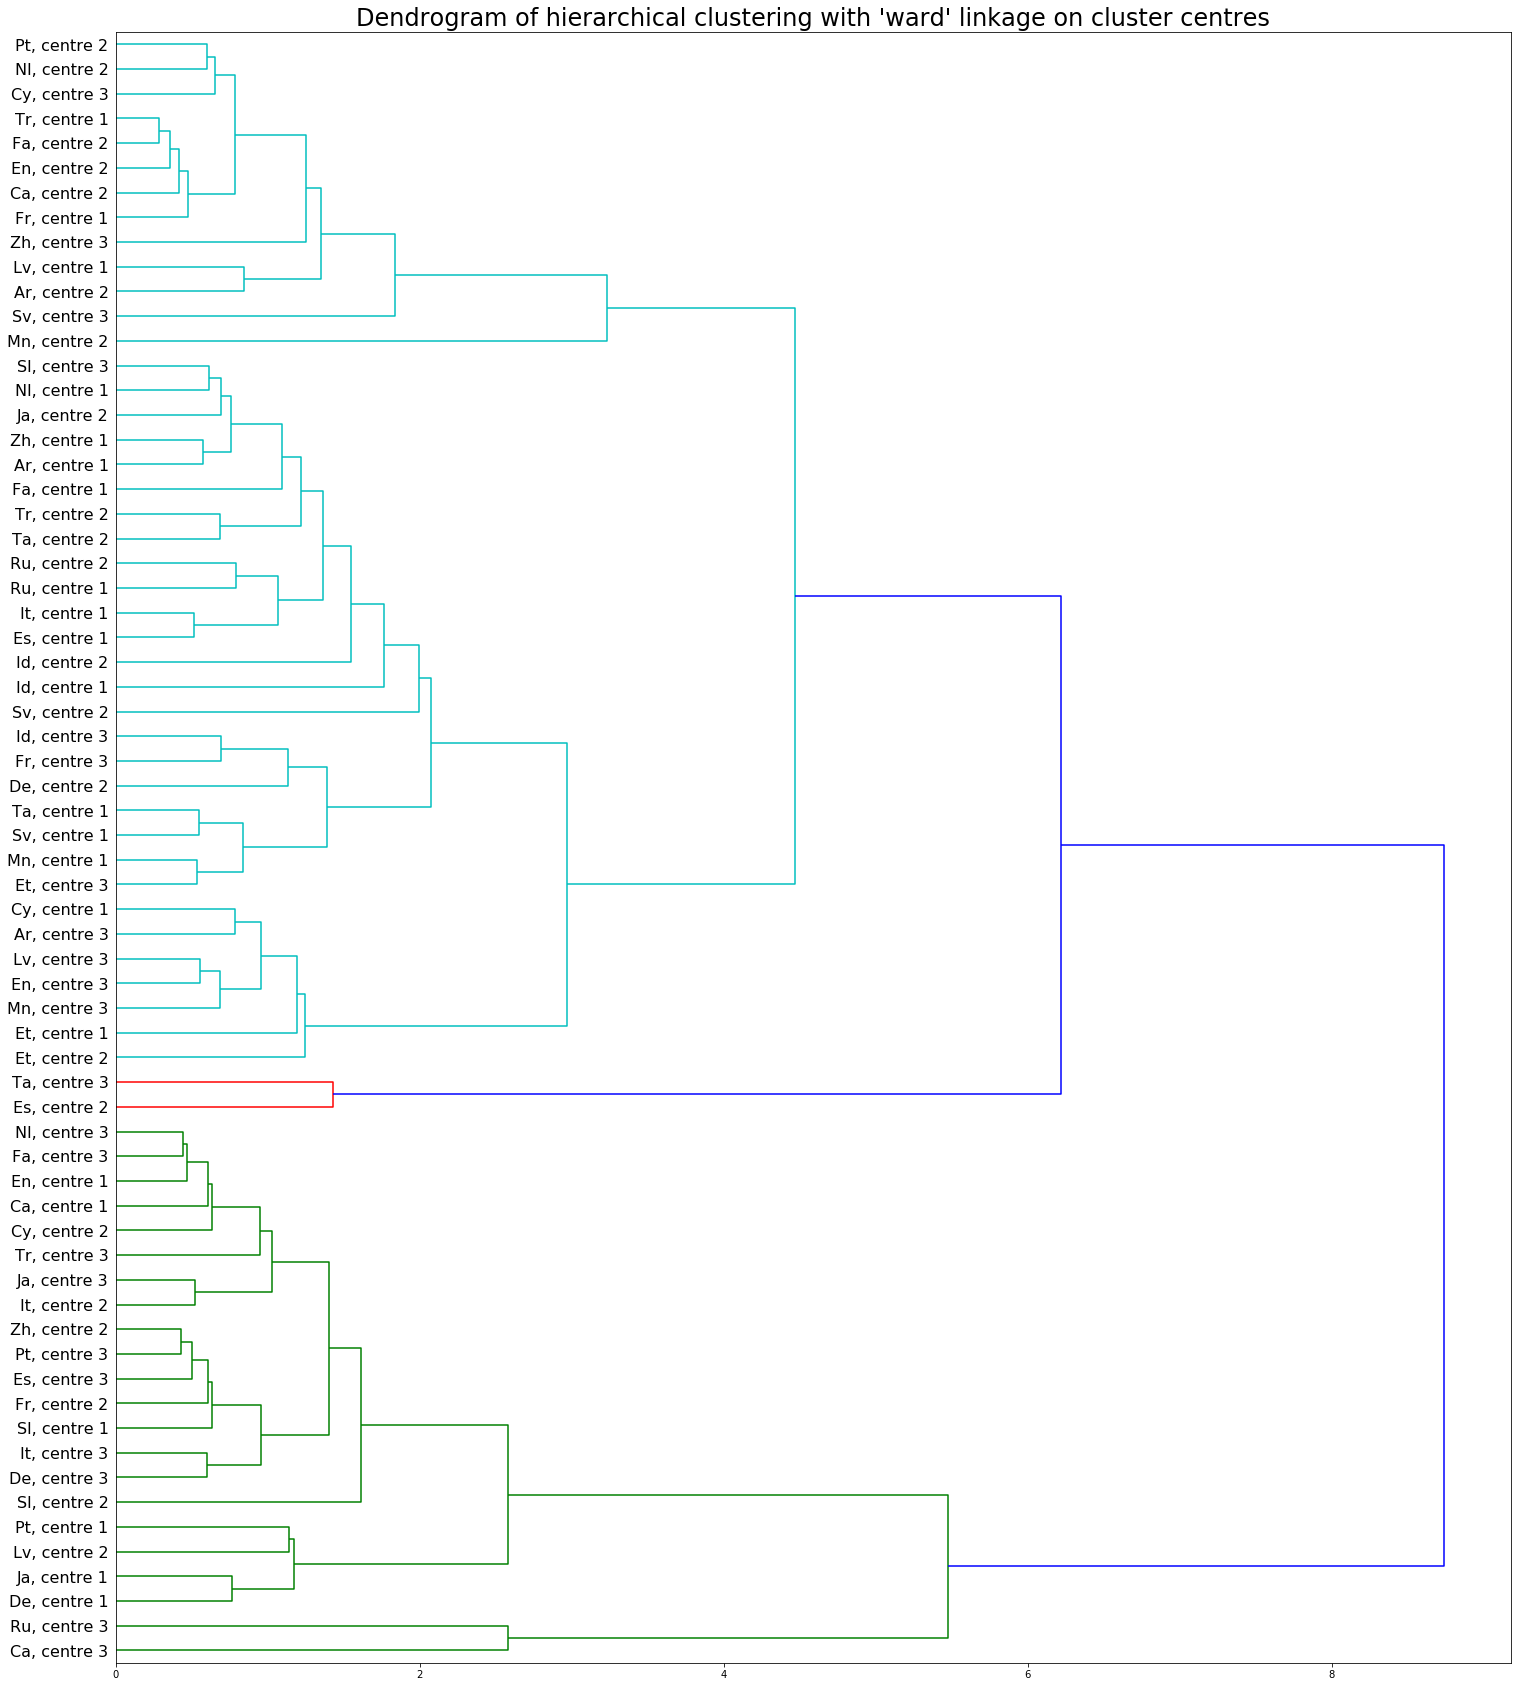

In [48]:
fig = plt.figure(figsize=(25, 30))
dn = dendrogram(Z_ward, orientation='right', leaf_font_size=16, labels=centre_labels)
plt.title('Dendrogram of hierarchical clustering with \'ward\' linkage on cluster centres', {'fontsize': 24})
plt.savefig('cluster_dendrogram_ward.png')
plt.show()

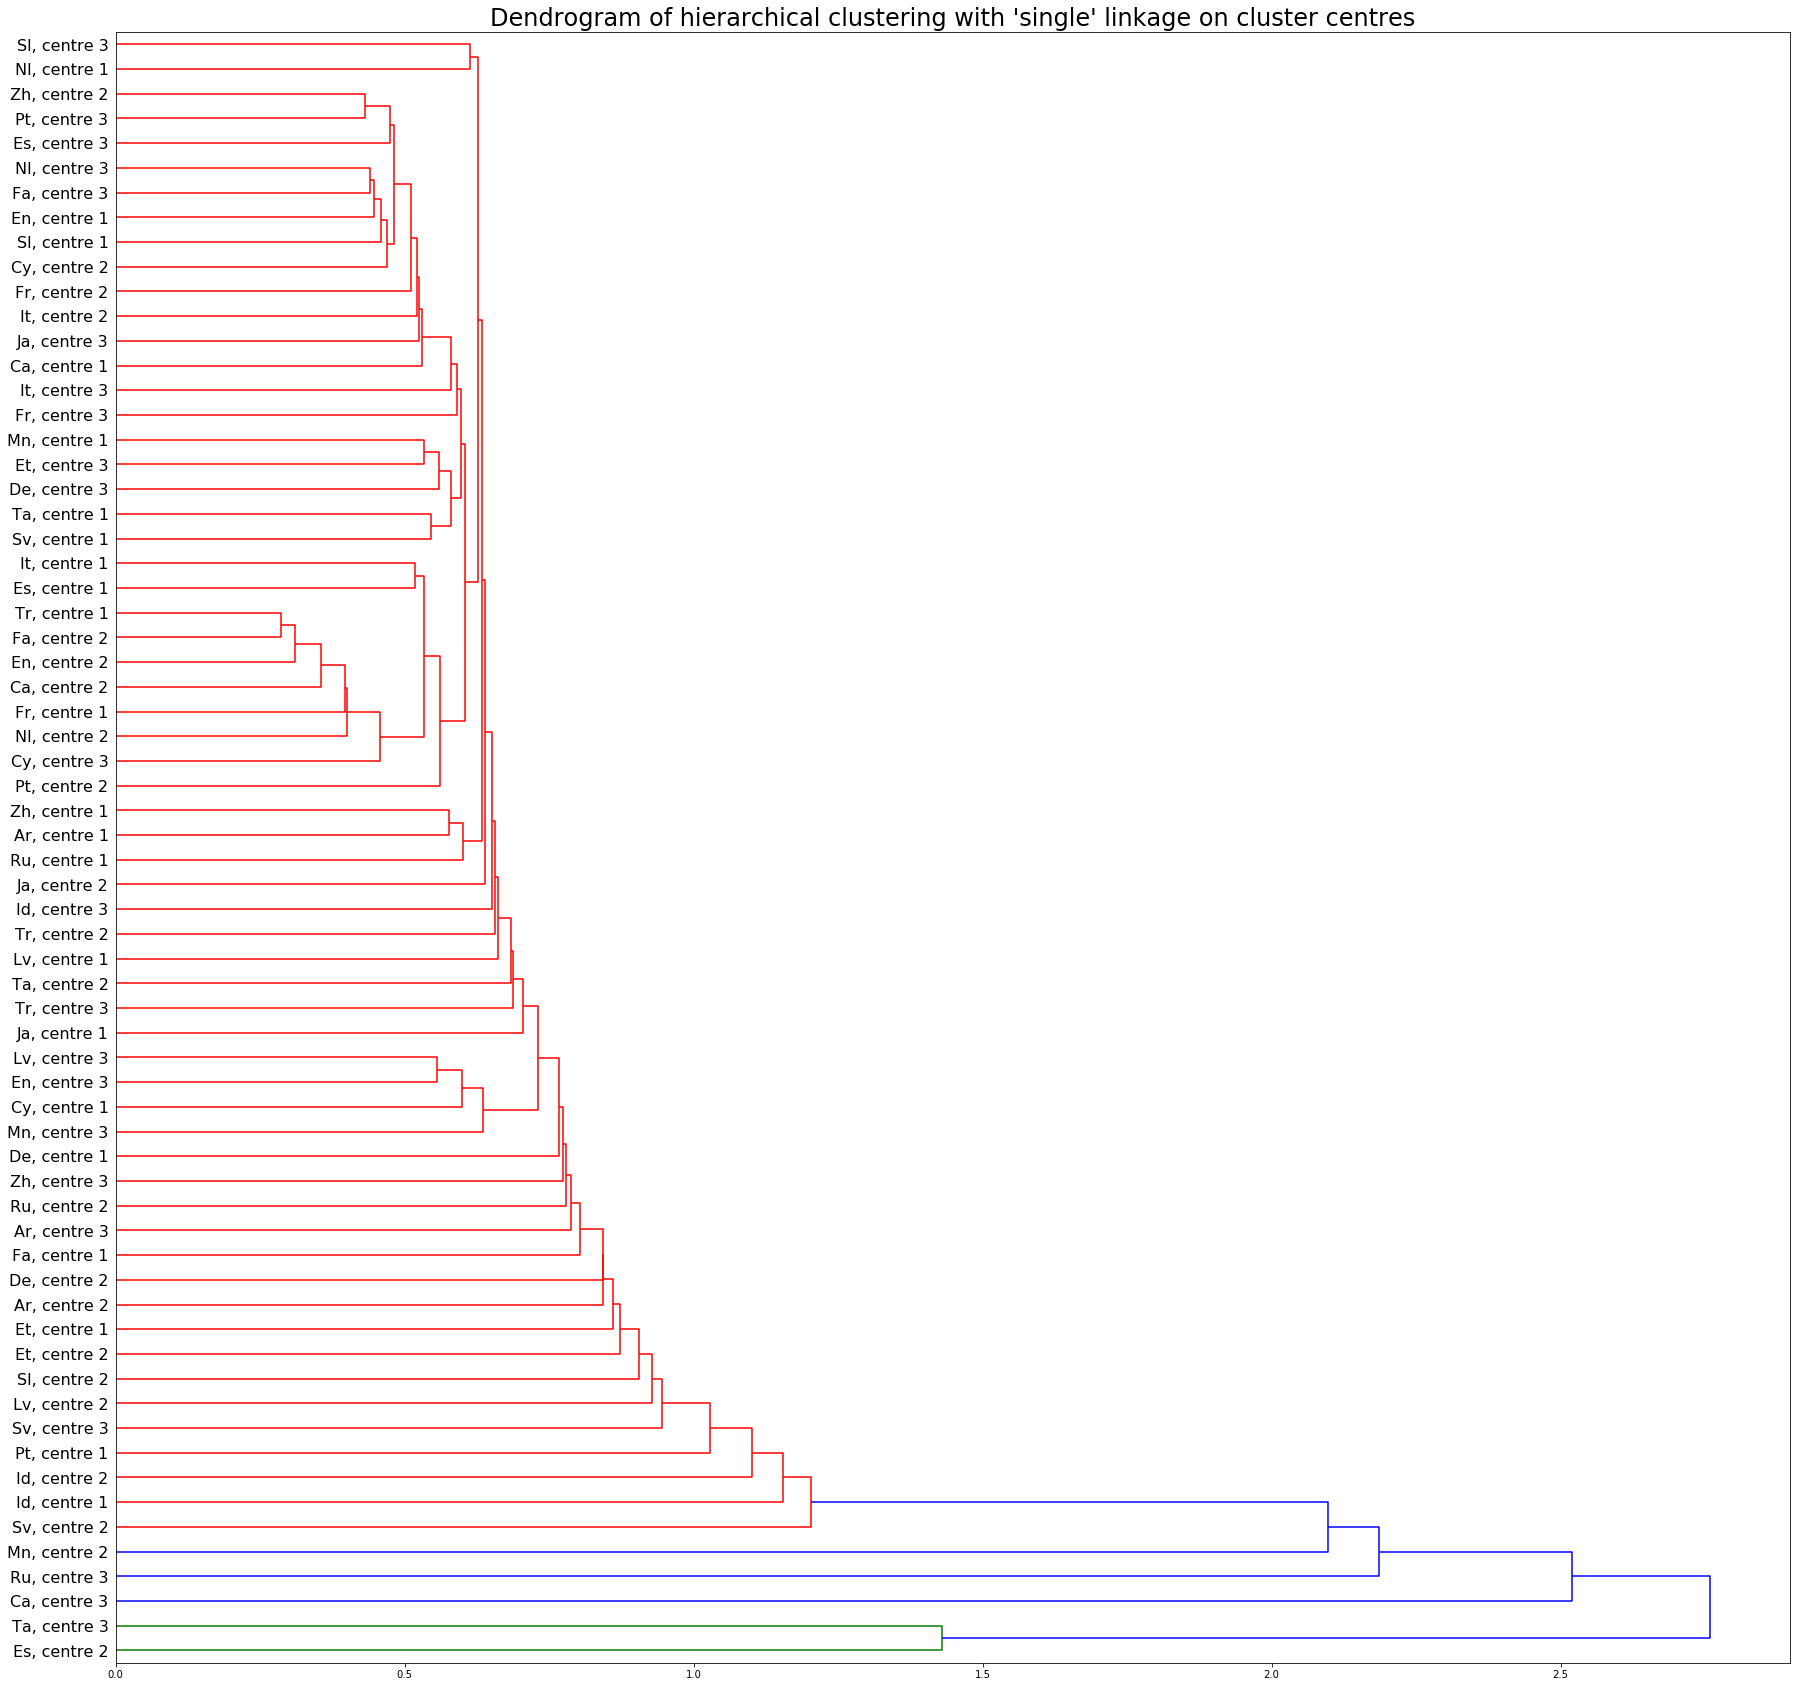

In [49]:
fig = plt.figure(figsize=(30, 30))
dn = dendrogram(Z_single, orientation='right', leaf_font_size=16, labels=centre_labels)
plt.title('Dendrogram of hierarchical clustering with \'single\' linkage on cluster centres', {'fontsize': 24})
plt.savefig('cluster_dendrogram_single.png')
plt.show()

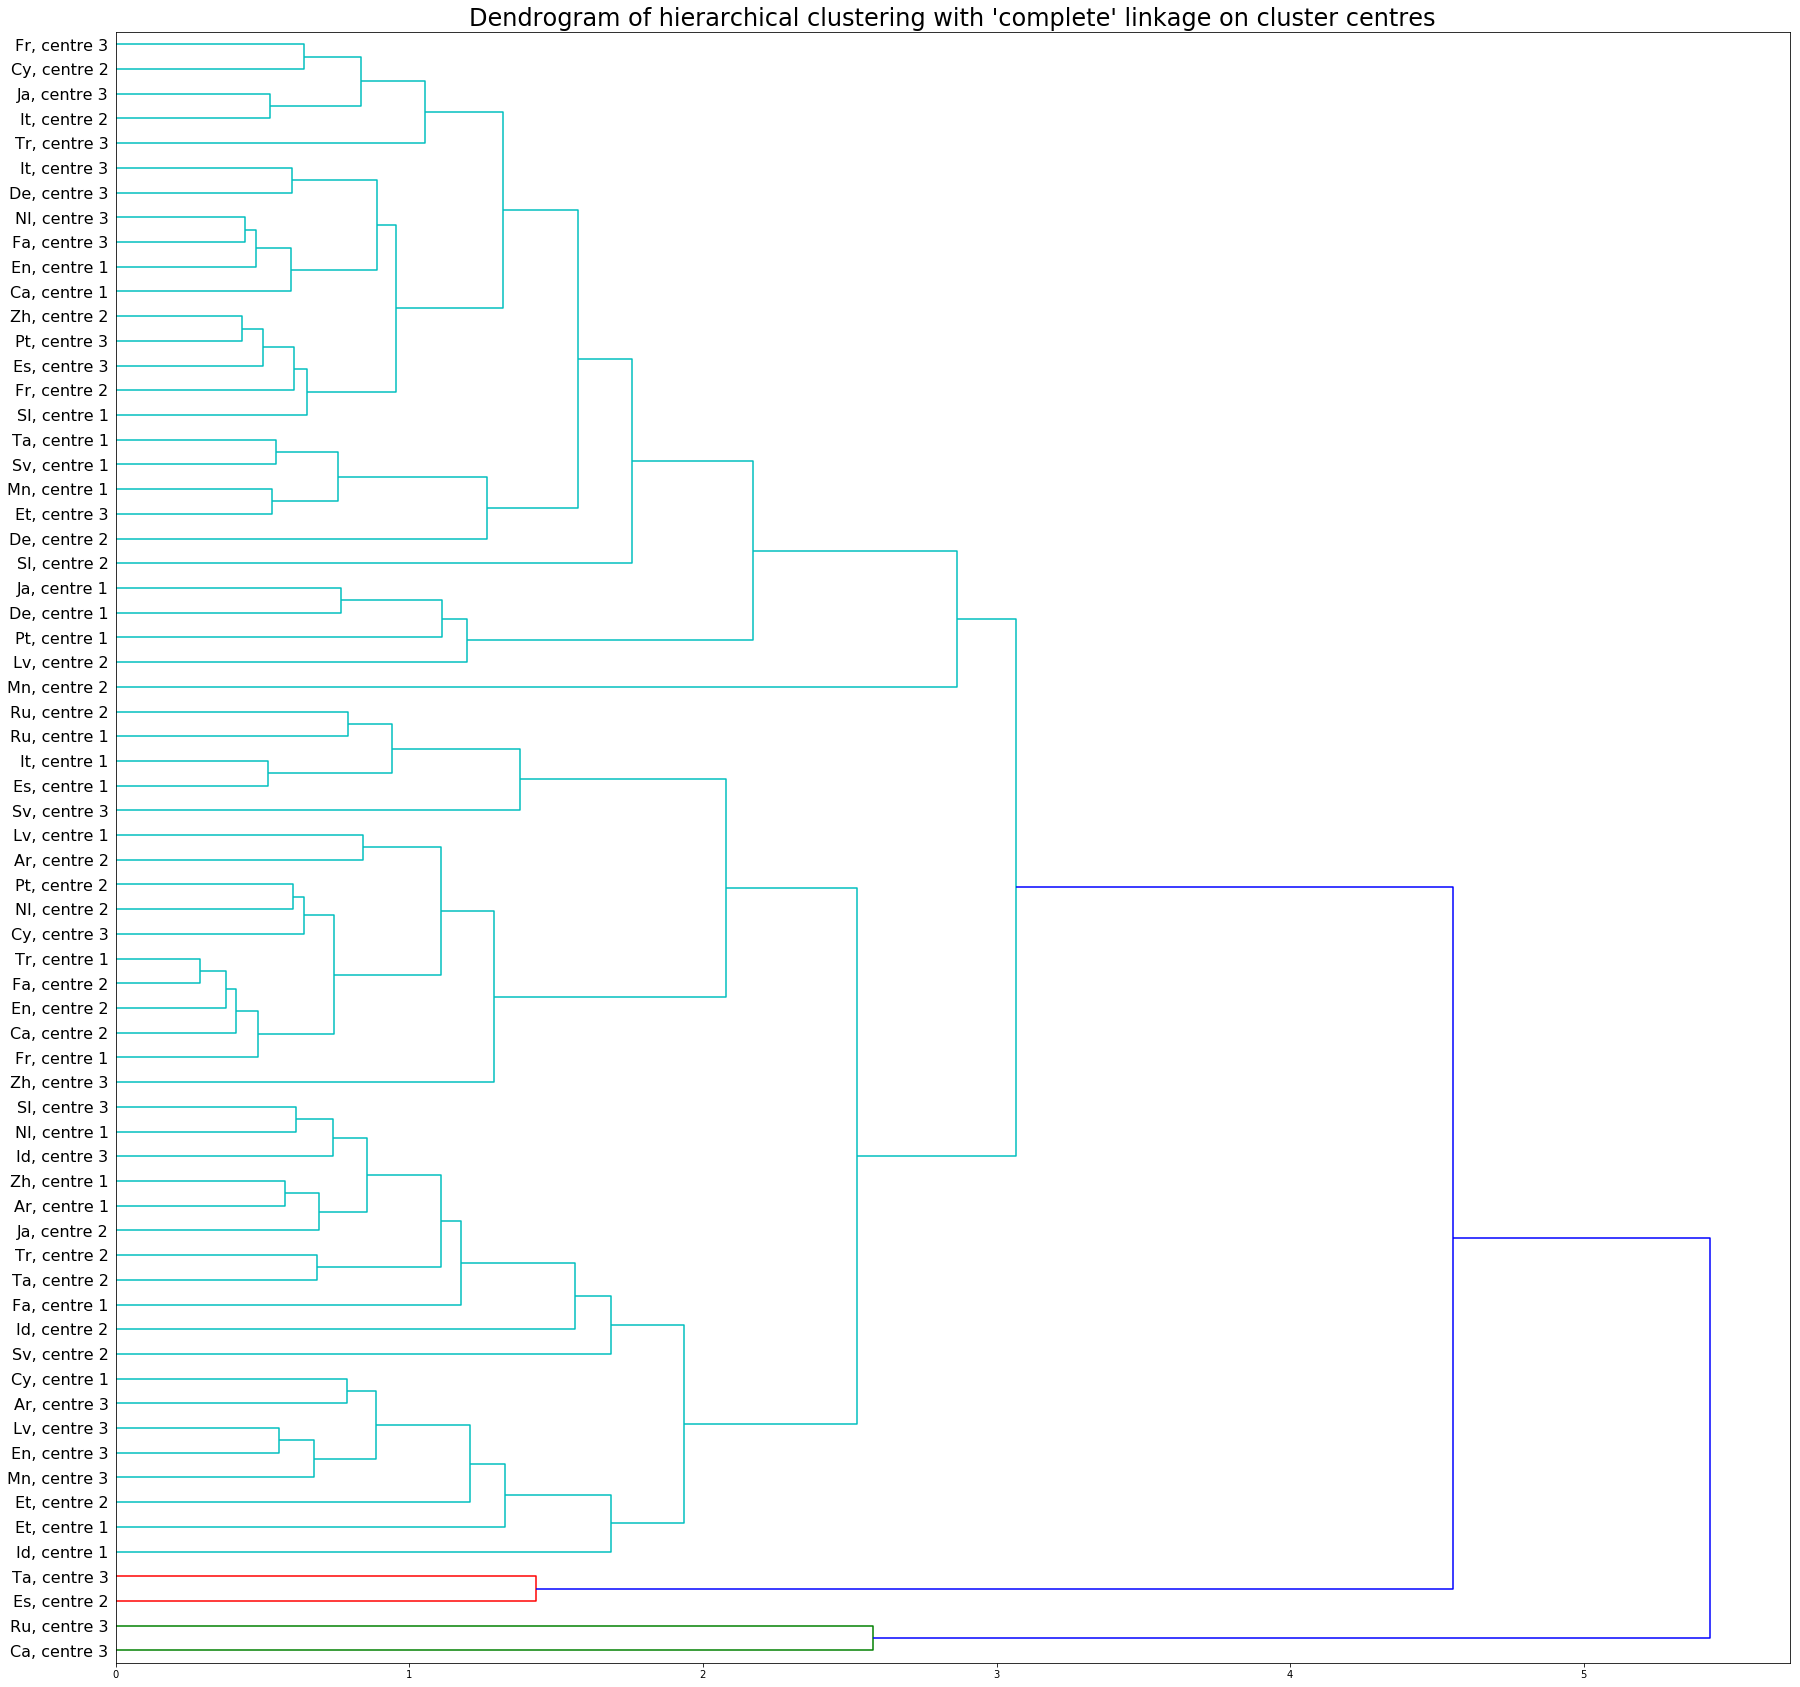

In [50]:
fig = plt.figure(figsize=(30, 30))
dn = dendrogram(Z_complete, orientation='right', leaf_font_size=16, labels=centre_labels)
plt.title('Dendrogram of hierarchical clustering with \'complete\' linkage on cluster centres', {'fontsize': 24})
plt.savefig('cluster_dendrogram_complete.png')
plt.show()

In [51]:
Xtrn_0 = Xtrn[Ytrn == 0]
Xtst_0 = Xtst[Ytst == 0]

In [52]:
covs = ['full', 'diag']
Ks = [1,3,5,10,15]

In [53]:
av_ll = np.zeros((2,2,5))

In [54]:
for i in range(2):
    for k in range(5):
        gmm = GaussianMixture(n_components=Ks[k],covariance_type=covs[i]).fit(Xtrn_0)
        av_ll[0][i][k] = gmm.score(Xtrn_0)
        av_ll[1][i][k] = gmm.score(Xtst_0)

In [55]:
av_ll

array([[[16.39360044, 18.05959899, 19.06541226, 21.03278986,
         22.80935124],
        [14.28041612, 15.39859493, 15.92790552, 16.96005956,
         17.58240233]],

       [[15.81051154, 16.98981871, 16.58207638, 15.17451882,
         12.33024781],
        [13.84292392, 15.0414001 , 15.62403971, 16.40599156,
         17.07720165]]])

In [56]:
av_ll_Xtrn = av_ll[0]
av_ll_Xtst = av_ll[1]

In [57]:
K = ['1','3','5','10','15']

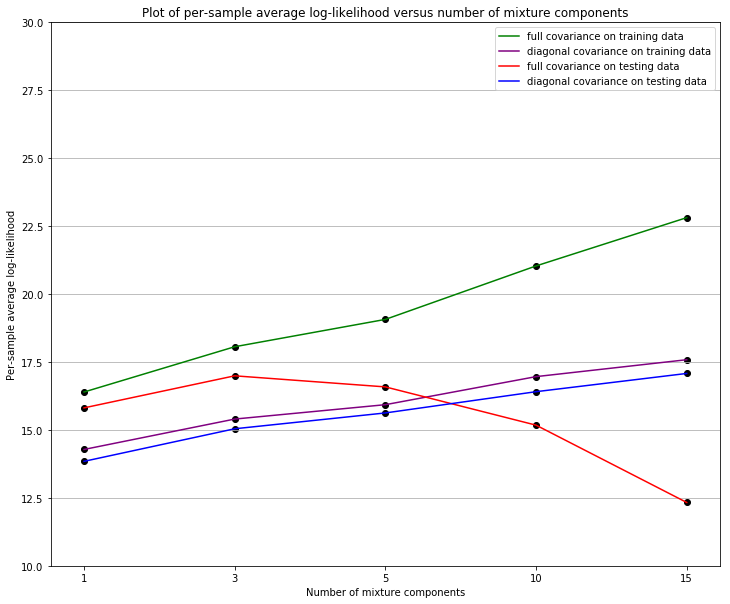

In [58]:
plt.figure(figsize=(12,10))
# Vary k on 'full' for training data
plt.scatter(K, av_ll_Xtrn[0], color='black')
plt.plot(K, av_ll_Xtrn[0], color='green', label='full covariance on training data')
plt.scatter(K, av_ll_Xtrn[1], color='black')
plt.plot(K, av_ll_Xtrn[1], color='purple', label='diagonal covariance on training data')
plt.scatter(K, av_ll_Xtst[0], color='black')
plt.plot(K, av_ll_Xtst[0], color='red', label='full covariance on testing data')
plt.scatter(K, av_ll_Xtst[1], color='black')
plt.plot(K, av_ll_Xtst[1], color='blue', label='diagonal covariance on testing data')
axes = plt.gca()
axes.yaxis.grid()
plt.ylim(10, 30)
plt.legend(loc='best')
plt.xlabel('Number of mixture components')
plt.ylabel('Per-sample average log-likelihood')
plt.title('Plot of per-sample average log-likelihood versus number of mixture components')
plt.savefig('av_LL.png')
plt.show()